# Predict the Twitter Accounts to be bots or not bots 
# Team Members: 
* Ashish Bansal - Worked on Naive Bayes
* John Martinez - Worked on Decision Tree
* Zhongheng Li - Worked on Logistic Regression


# Abstract
In this project we explored how to classify twitter accounts as bots or not-bots accurately. To do this, we harvested several datasets and used them to train our model to distinguish bots from real users. The machine learning algorithms known as Naive bayes, logistic regression, and decision trees were tested. We will present here the results from the most successful of these and upon deciding which algorithm performs the best.


# Data
The data set used is an extract from Twitter API we used the module to query two endpoints: GET user/lookup.json  and GET user/friends/list.json. originally intended to search as tweets by a certain user and tweets of friends of certain user account . The original data set has 130 attributes per user id . This dataset is a mixed set in which we can find many categorical and numerical variables with a lot of missing values. From all the attributes these were the ones that we considered:'id','id_str','screen_name','location','description','url','followers_count','friends_count','listedcount','created_at','favourites_count','verified','statuses_count','lang',
'status','default_profile','default_profile_image','has_extended_profile','name'. And we also created the new target variable 'bot' based on the results during data collection to indicate if the account is a bot or not bot.


# Description of Variables

The dataset contains 2231 observations of 20 variables:

* 'id' - The integer representation of the unique identifier for this User.
* 'id_str' - The string representation of the unique identifier for this User. 
* 'screen_name' - The screen name, handle, or alias that this user identifies themselves with. screen_names are unique but subject to change.
* 'location' - The user-defined location for this account’s profile.
* 'description' - Nullable . The user-defined UTF-8 string describing their account
* 'url' - A URL provided by the user in association with their profile.
* 'followers_count' -The number of followers this account currently has. Under certain conditions of duress.
* 'friends_count' - The number of users this account is following . Under certain conditions of duress. 
* 'listedcount' - Contains the number of public lists that this user is a member of.
* 'created_at' - The UTC datetime that the user account was created on Twitter
* 'favourites_count' - The number of tweets this user has favorited in the account’s lifetime. British spelling used in the field name for historical reasons
* 'verified' - When true, indicates that the user has a verified account.
* 'statuses_count' - The number of tweets (including retweets) issued by the user. 
* 'lang' - The BCP 47 code for the user’s self-declared user interface language. May or may not have anything to do with the content of their Tweets.
* 'status' - If possible, the user’s most recent tweet or retweet. In some circumstances, this data cannot be provided and this field will be null.
* 'default_profile' - When true, indicates that the user has not altered the theme or background of their user profile
* 'default_profile_image' - When true, indicates that the user has not uploaded their own avatar and a default egg avatar is used instead
* 'has_extended_profile' - Indication to show that a user has another profile that is associating with this profile.
* 'name' - The name of the user, as they’ve defined it. Not necessarily a person’s name. Typically capped at 20 characters, but subject to change.

# Problem Statement

A [recent research](https://arxiv.org/pdf/1703.03107.pdf) conducted by the University of Southern California and Indiana University, had discovered that 48 millions of Twitter accounts are non human bots. Which is 15% of Twitter's total active user population. Many of these social bots are being used for dissemination of news and publications. But not all bots are disseminating contents that are harmless. Malicious bots are emulating human behaviors to manufacture fake grassroots political support and promote terrorist propagandas and recruitments. On November 1st, 2016, The Atlantic had an [article on how Twitter bots had shaped the 2016 US Presidential election](https://www.theatlantic.com/technology/archive/2016/11/election-bots/506072/). As we are in the age of  information, where social media has great impacts on shaping the social structure and humanity, identifying the malicious socialbots is critical. It is critical for identifying the sources of malicious fake information, and distinguish the malicious ones from the useful bots that are providing helpful functions like alerting disasters and providing useful customer services. In order to achieve this goal, the first step is to distinguish all bots from real users. 





# Import modules

In [1]:
import numpy as np
import pandas as pd

from scipy.stats import entropy
import os

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import statsmodels.api as sm
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline


from sklearn.ensemble import RandomForestClassifier


import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (12, 6))




/Users/Heng2j/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Data Preparion and Data Clearning: 

Import the file and create the dataframe and additional useful features

In [2]:
names=['id','id_str','screen_name','location','description','url','followers_count','friends_count','listedcount','created_at','favourites_count','verified','statuses_count','lang','status','default_profile','default_profile_image','has_extended_profile','name','bot']

In [3]:
bots_data = pd.read_csv('/Users/Heng2j/Documents/NYU Grad /Spring 2017/Machine Learning/project/bots_data.csv',encoding="ISO-8859-1",header = None, na_values='?',delim_whitespace=False,)
bots_data = bots_data.ix[1:]

nonbots_data = pd.read_csv('/Users/Heng2j/Documents/NYU Grad /Spring 2017/Machine Learning/project/nonbots_data.csv',encoding="ISO-8859-1",header = None,na_values='?',delim_whitespace=False,)
nonbots_data = nonbots_data.ix[1:]


data_frames = [bots_data, nonbots_data]

df = pd.concat(data_frames)
df.columns = names




#df = pd.read_csv('/Users/Heng2j/Documents/NYU Grad /Spring 2017/Machine Learning/project/merged.csv',encoding="ISO-8859-1",
#                 header=None,delim_whitespace=False,names=names,na_values='?',)





In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2232 entries, 1 to 1176
Data columns (total 20 columns):
id                       2232 non-null object
id_str                   2232 non-null object
screen_name              2232 non-null object
location                 1420 non-null object
description              1911 non-null object
url                      1212 non-null object
followers_count          2232 non-null object
friends_count            2232 non-null object
listedcount              2232 non-null object
created_at               2232 non-null object
favourites_count         2232 non-null object
verified                 2232 non-null object
statuses_count           2232 non-null object
lang                     2232 non-null object
status                   2203 non-null object
default_profile          2232 non-null object
default_profile_image    2232 non-null object
has_extended_profile     2154 non-null object
name                     2232 non-null object
bot                

In [5]:
df.verified=df.verified.astype('bool')
df.verified=df.verified.astype(int)
df.default_profile=df.default_profile.astype('bool')
df.default_profile=df.default_profile.astype(int)
df.default_profile_image=df.default_profile_image.astype('bool')
df.default_profile_image=df.default_profile_image.astype(int)


df.followers_count = df.followers_count.astype(int)
df.friends_count = df.friends_count.astype(int)
df.listedcount = df.listedcount.astype(int)
df.favourites_count = df.favourites_count.astype(int)
df.statuses_count = df.statuses_count.astype(int)
df.bot = df.bot.astype(int)

In [6]:
# Creating more features from given dataframe
df["screen_name_len"] = [len(i) for i in df["screen_name"]]
df["bot_is_substr"] = [int('bot' in i.lower()) for i in df["screen_name"]]
df["bot_in_des"] = [int('bot' in str(i).lower()) for i in df['description']]

# Getting the ages in years from created_at
ages = []
for i in df["created_at"]:
    if len(i) > 20:
        i = i.split()
        year = int(i[5][:4]) % 2000 
    else:
        i = i.split('/')
        year = int(i[2].split()[0]) % 2000
    age = 17-year
    ages.append(age)
df["age"] = ages



In [7]:
# This cell is for adding polarity and subjectivity as features 
from textblob import TextBlob

descriptions = [TextBlob(str(txt)) for txt in df['description']]

# Creating lists of the polarity and the descriptions
desc_pol = [blob.sentiment.polarity for blob in descriptions]
desc_subj = [blob.sentiment.subjectivity for blob in descriptions]

# Turning them into features
df["desc_pol"] = desc_pol
df["desc_subj"] = desc_subj

In [8]:
# gender 
from genderize import Genderize

male = [0] * 2231
female = [0] * 2231
i = 0

names = list(df.name.astype(str))

for name in names:
    print(name)
    name = name.split()
    try:
        gInfo = Genderize().get(name)
        m = 1
        f = 1
        for item in gInfo:
            if item['gender'] == 'male':
                male[i] += item['probability']
                m += 1
            elif item['gender'] == 'female':
                female[i] += item['probability']
                f += 1
        male[i] /= m
        female[i] /= f
    except Exception:
        pass
    
    i += 1

df['male_prob'] = male
df['fem_prob'] = female
        

McGucket bot
MJ Kuhn
duckNote
robot recipes
ÌÇvÌÇrÌÀ Ì_mlÌ_Ì_¼Ñ
GLOSSATORY
Fancypants
YOU the Hedgehog
Jamie Phillips
Donella Nothem
Ebooks Brilhantes
_ image bot convos _
Kindra Stobbe
cga.graphics
Helen Nguyen
Michael Nishimura
He's-a-back!
litpatches_txt
Every Simile
Jeff Christensen
"Far-West"
Dr. Phil Notademon
Divina Cooper
Library of Emoji
PS & WRAP
Fake Bloomberg News
Oliver Twitch
Brock Jargotron
Games 4 Grownups
Lowpoly Bot
2blessed.exe
poem.exe
EdSurge HigherEd
GUNNERCARTERXX
Mohamed Abd El-Rhman
Star Near You
wayback_exe
wutahiq19
LSystemBot 1.0
Low Battery
yeahashleyrober
Wonder Woman
Game Walkthroughs
Netflix Genres
Altha Feinman
Voynich Tech News
READ BOI XX5SOSVINES
throam bot
"Pokemon"
ButtFeed
Gilgamesh Bot
dronesweetie
Penry Parmelee
Altagracia Sanders
Book On Balcony
Superb Owl
a river
tiny astronaut
ceubehen
Lillian Warner
kpop
marcelinep16
epigenetics_papers
TardyGram
Space Sloth
LucileRobertsa
Pussy-kun
Advent V. Recall
Great Artist
Nerd@Justin fan
patrinafb

ValueError: Length of values does not match length of index

In [9]:
#Reindex the merged dataframe df
df.reset_index(drop=True, inplace=True)

In [10]:
#Double check to see if there is any duplicated indexes
df[df.index.duplicated()]

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listedcount,created_at,...,default_profile_image,has_extended_profile,name,bot,screen_name_len,bot_is_substr,bot_in_des,age,desc_pol,desc_subj


In [11]:
#show current info for df after the above chagnes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2232 entries, 0 to 2231
Data columns (total 26 columns):
id                       2232 non-null object
id_str                   2232 non-null object
screen_name              2232 non-null object
location                 1420 non-null object
description              1911 non-null object
url                      1212 non-null object
followers_count          2232 non-null int64
friends_count            2232 non-null int64
listedcount              2232 non-null int64
created_at               2232 non-null object
favourites_count         2232 non-null int64
verified                 2232 non-null int64
statuses_count           2232 non-null int64
lang                     2232 non-null object
status                   2203 non-null object
default_profile          2232 non-null int64
default_profile_image    2232 non-null int64
has_extended_profile     2154 non-null object
name                     2232 non-null object
bot                      22

# Prepare dataframes
Normally randomized the data and split the training dataframe and test dataframe

In [12]:
for a in range(1000):
    randomized_Data = df.reindex(np.random.permutation(df.index))

train_df = randomized_Data[:int((len(randomized_Data)+1)*.80)]
test_df = randomized_Data[int((len(randomized_Data)+1)*.80):] 





In [13]:
#Create the Predicting Variables and Targeting Variables for Traning and Test sets
X_train = train_df.drop('bot', 1)
Y_train = train_df['bot']


X_test = test_df.drop('bot', 1)
Y_test = test_df['bot']

## plotUnivariateROC function to help to visulize the data and model

In [14]:
def plotUnivariateROC(preds, truth, label_string):
 
   
    fpr, tpr, thresholds = roc_curve(truth,preds, pos_label=1)
    roc_auc = auc(fpr,tpr)

    if roc_auc < 0.5:
        fpr, tpr, thresholds = roc_curve(truth, -1 * preds,pos_label=1 )
        roc_auc = auc(fpr, tpr)

    c = (np.random.rand(), np.random.rand(), np.random.rand())

    plt.plot(fpr, tpr, color = c, label = label_string + ' (AUC = %0.3f)' % roc_auc)
    

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")
    
    return roc_auc

# Traning Models - Naive Bayes
By Ashish Bansal


In [15]:
X_train_NB, X_test_NB, y_train_NB, y_test_NB = train_test_split(df.ix[:,0:13], df['bot'], test_size=0.2, random_state=0)

#tf for training data
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train_NB['description'].values.astype('U'))
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)

#tf for test data
X_test_counts = count_vect.transform(X_test_NB['description'].values.astype('U'))
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_test_counts)
X_test_tf = tf_transformer.transform(X_test_counts)

#classifer training
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tf, y_train_NB)
#prediction for test data
predicted = clf.predict(X_test_tf)

import numpy as np
np.mean(predicted == y_test_NB)

0.76957494407158833

In [16]:
from sklearn.metrics import *
print("Accuracy Score:", (accuracy_score(y_test_NB,predicted )))
print("Precision Score: ", (precision_score(y_test_NB,predicted,average='micro' )))
print("Recall Score: ", (recall_score(y_test_NB,predicted,average='micro' )))
print("F1 Score: ", (f1_score(y_test_NB,predicted,average='micro' )))
#print("AUC Score: ", (roc_auc_score(y_test_NB,predicted,average=None )))

Accuracy Score: 0.769574944072
Precision Score:  0.769574944072
Recall Score:  0.769574944072
F1 Score:  0.769574944072


In [17]:
from sklearn import metrics
from sklearn.metrics import *
fpr, tpr, thresholds = metrics.roc_curve(y_test_NB, predicted,pos_label=1)
metrics.auc(fpr, tpr)

0.77027027027027017

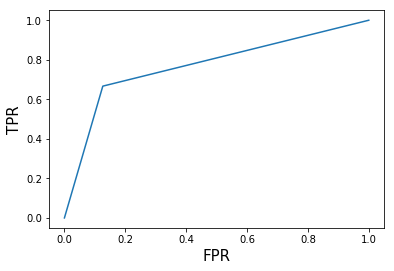

In [18]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_NB, predicted,pos_label=1)
metrics.auc(fpr,tpr)
#x = np.array(fpr)
#y = np.array(tpr)
plt.xlabel('FPR',fontsize=15)
plt.ylabel('TPR',fontsize=15)
plt.plot(fpr,tpr)

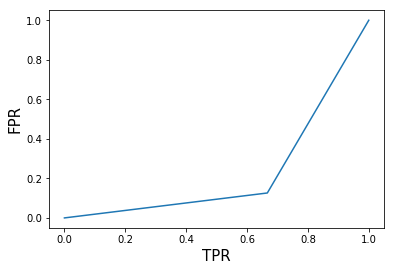

In [19]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_NB, predicted,pos_label=1)
metrics.auc(fpr,tpr)
plt.ylabel('FPR',fontsize=15)
plt.xlabel('TPR',fontsize=15)
plt.plot(tpr,fpr)

In [21]:
print("Precision Score: ", (precision_score(y_test_NB,predicted,average='weighted' )))

Precision Score:  0.782350851884


In [28]:
preds_lr_nb = clf.predict_proba(X_test_tf)[:, 1]

0.84558558558558561

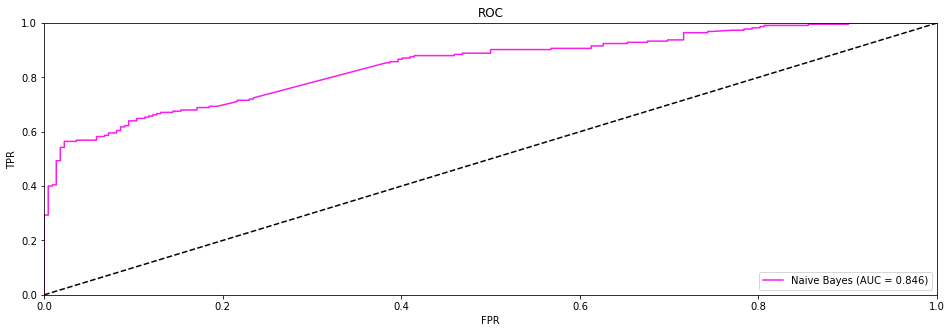

In [87]:
plotUnivariateROC(preds_lr_nb, y_test_NB, 'Naive Bayes')

# Traning Models - Decision Tree
By John Martinez


Traning Average accuracy: 0.875683457741
Traning Average Precision: 0.865874727899
Accuracy on test set:  0.860986547085


{'age': 0.41812469397384999,
 'bot_in_des': 0.020269694943727334,
 'bot_is_substr': 0.011245654886009988,
 'favourites_count': 0.072335474640644465,
 'followers_count': 0.10057630286569416,
 'friends_count': 0.17403049460676587,
 'listedcount': 0.039083477560105356,
 'screen_name_len': 0.036297163915626589,
 'statuses_count': 0.12803704260757631}

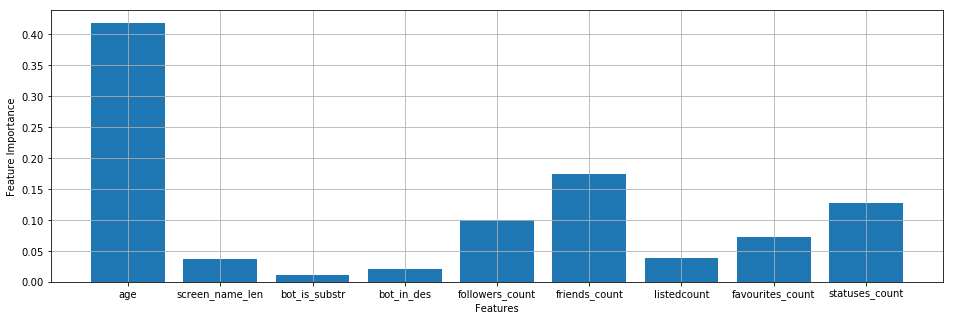

In [30]:
dt = DecisionTreeClassifier(criterion='entropy')

# treeNames are only the numerical and binary features with importance > 0 
treeNames=['age','screen_name_len', 'bot_is_substr','bot_in_des','followers_count','friends_count','listedcount', 'favourites_count','statuses_count']

# Getting the training sets and fitting the tree
df_train = train_df[treeNames+['bot']]
x_train = train_df[treeNames]
y_train = train_df.bot.astype(bool)
dt.fit(x_train, y_train)

# Evaluating the tree with cross-val
accuracy = cross_val_score(dt, x_train, y_train, cv=5, scoring = "accuracy")
precision = cross_val_score(dt, x_train, y_train, cv=5, scoring = "precision")

# Graphing the feature importance 
import matplotlib.pyplot as plt
%matplotlib inline

feature_mi_dict = dict(zip(df_train.columns.values,dt.feature_importances_))
feature_mi_dict
feature_importance_X = feature_mi_dict.keys()
feature_importance_Y = feature_mi_dict.values()
plt.rcParams['figure.figsize'] = (16, 5)
plt.bar(range(len(feature_mi_dict)), feature_mi_dict.values(), align='center')
plt.xticks(range(len(feature_mi_dict)), feature_mi_dict.keys())
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.grid(True)

# Printing the evaluations 
print("Traning Average accuracy:",accuracy.mean())
print("Traning Average Precision:",precision.mean())


predicts = dt.predict(X_test[treeNames])

Test_accuracy = metrics.accuracy_score(test_df['bot'], predicts)

print('Accuracy on test set: ',Test_accuracy )





feature_mi = dt.feature_importances_

feature_mi

feature_mi_dict = dict(zip(x_train.columns.values,feature_mi))

feature_mi_dict

## Use entropy of decision tree to evlauate the importance of features

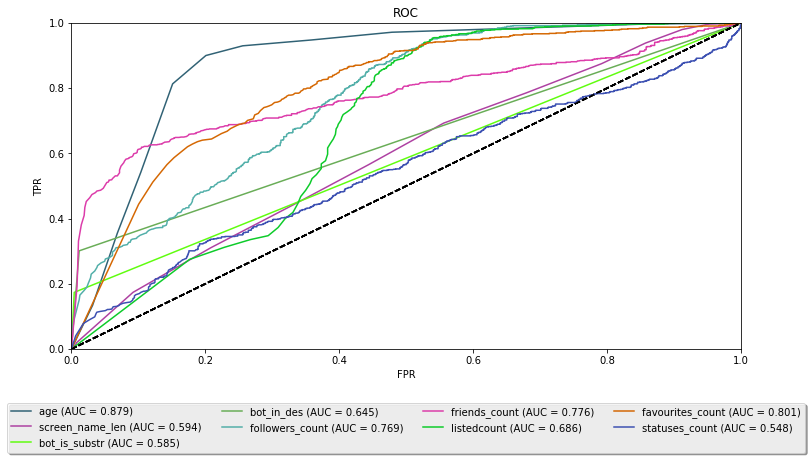

In [31]:
fig = plt.figure(figsize = (12, 6))
ax = plt.subplot(111)


train_df_modf = train_df[treeNames]


feature_auc_dict = {}
for col in train_df_modf.columns:
    feature_auc_dict[col] = plotUnivariateROC(train_df_modf[col], Y_train, col)


box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.0 , box.width, box.height * 1])
ax.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.15), fancybox = True, 
              shadow = True, ncol = 4, prop = {'size':10})

In [32]:
# Splitting the set 80-20 with train_test_split from sklearn metrics
#bot = df['bot']
#X_train, X_test, Y_train, Y_test = train_test_split(df[treeNames].ix[:,0:13], bot, test_size=0.2, random_state=42)


min_samples_split_values = list(range(20,70,5))
min_samples_leaf_values = list(range(20,30,1))

test_set_accuracy = []

for i in range(10):
    
    min_samples_split_value = min_samples_split_values[i]
    for j in range(10):
        min_samples_leaf_value = min_samples_leaf_values[j]    
        
        # Fitting and evaluating a tree
        splitDt = DecisionTreeClassifier(criterion='entropy',max_depth = 5, min_samples_split = min_samples_split_value,  min_samples_leaf = min_samples_leaf_value)
        splitDt.fit(X_train[treeNames], Y_train)
        predict = splitDt.predict(X_test[treeNames])
        accuracy = metrics.accuracy_score(predict, Y_test)
    
        test_set_accuracy.append(accuracy)

        
        
print("Maximum Test Accuracy:", max(test_set_accuracy),"\nMinimum Test Accuracy:", min(test_set_accuracy))
print("Average Test Accuracy:",sum(test_set_accuracy)/len(test_set_accuracy))

Maximum Test Accuracy: 0.847533632287 
Minimum Test Accuracy: 0.845291479821
Average Test Accuracy: 0.845739910314


In [33]:
#Cross Validation Scores:


precision = cross_val_score(dt, X_test[treeNames], Y_test, cv=5, scoring = 'precision')
avg_precision = sum(precision) / 5


recall = cross_val_score(dt, X_test[treeNames], Y_test, cv=5, scoring = 'recall')
avg_recall = sum(recall) / 5


F1 = cross_val_score(dt, X_test[treeNames], Y_test, cv=5, scoring = 'f1')
avg_F1 = sum(F1) / 5

AUC = cross_val_score(dt, X_test[treeNames], Y_test, cv=5, scoring = 'roc_auc')
avg_AUC = sum(AUC) / 5



print('Cross-validation:')


print('Using decision tree for precision score:', precision)
print('Take the average of decision tree precision score:', avg_precision )
print('' )

print('Using decision tree for recall score:', recall )
print('Take the average of recall score:', avg_recall )
print('' )



print('Using decision tree for F1 score:', F1 )
print('Take the average of decision tree F1 score:', avg_F1 )
print('' )



print('Using decision tree for AUC score:', AUC )
print('Take the average of decision tree AUC score:', avg_AUC )
print('' )
print('' )



Cross-validation:
Using decision tree for precision score: [ 0.86363636  0.90909091  0.82222222  0.9047619   0.84615385]
Take the average of decision tree precision score: 0.869173049173

Using decision tree for recall score: [ 0.84090909  0.93023256  0.8372093   0.88372093  0.74418605]
Take the average of recall score: 0.847251585624

Using decision tree for F1 score: [ 0.85057471  0.94117647  0.8372093   0.9047619   0.80487805]
Take the average of decision tree F1 score: 0.86772008782

Using decision tree for AUC score: [ 0.86610672  0.91076845  0.86501517  0.90925177  0.81850354]
Take the average of decision tree AUC score: 0.873929129516




In [34]:
preds_dt=dt.predict_proba(X_test[treeNames])[:,1]

0.86211755233494369

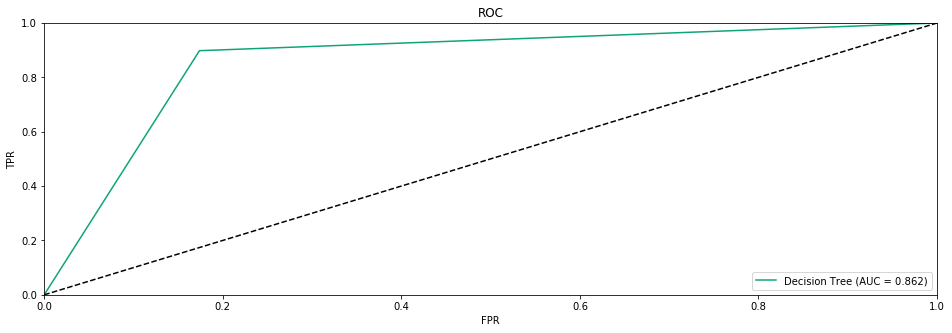

In [39]:
plotUnivariateROC(preds_dt, Y_test, 'Decision Tree')

# Traning Models - Logistic Regression
By Zhongheng Li

Since our problem is a clasification problem, logistic regression is the more suiltable model that we can use for our predition. 




In [41]:
X_train = train_df.drop('bot', 1)
Y_train = train_df['bot']


X_test = test_df.drop('bot', 1)
Y_test = test_df['bot']

In [42]:
#Flatten the target variable on both traning and test set for logistic regression
Y_train_LR = np.ravel(Y_train)
Y_test_LR =  np.ravel(Y_test)

In [43]:
#Select the features

# features are only the numerical and binary features 
features=['age','followers_count','friends_count','listedcount', 'verified', 'favourites_count','statuses_count','default_profile','default_profile_image','screen_name_len','bot_is_substr','bot_in_des']

features

['age',
 'followers_count',
 'friends_count',
 'listedcount',
 'verified',
 'favourites_count',
 'statuses_count',
 'default_profile',
 'default_profile_image',
 'screen_name_len',
 'bot_is_substr',
 'bot_in_des']

In [44]:
# To train our model with above features
model = LogisticRegression()
model = model.fit(X_train[features], Y_train_LR)

# check the accuracy on the training set with the test set data
print('Initial Traning Accuracy:',model.score(X_train[features], Y_train_LR))
print('Initial Test Accuracy:',model.score(X_test[features], Y_test_LR))

Initial Traning Accuracy: 0.73516237402
Initial Test Accuracy: 0.710762331839


In [45]:
#Examine the coefficients to evaluate the weights for each features above
pd.DataFrame(list(zip(X_train[features].columns, np.transpose(model.coef_))))




,0,1
0,age,[-2.16156762954e-05]
1,followers_count,[-3.64084355884e-07]
2,friends_count,[6.28691485365e-06]
3,listedcount,[-0.000794617092691]
4,verified,[1.8178700417e-06]
5,favourites_count,[-0.00012767478018]
6,statuses_count,[2.45707146437e-05]
7,default_profile,[1.8178700417e-06]
8,default_profile_image,[1.8178700417e-06]
9,screen_name_len,[2.75445261514e-05]


In [46]:
#Reduce features that has negative coefficients and high frustration. And than manually compute the accuracies by remove the remaining features one at a time to compute the highest accuracy
#Eventually, we picked 'followers_count','friends_count','favourites_count','statuses_count'
features=['followers_count','friends_count','favourites_count','statuses_count']


#Train the model again with new updated features
model = LogisticRegression()
model = model.fit(X_train[features], Y_train_LR)

# check the accuracy on the training set with the test set data
print('Updated Traning Accuracy:',model.score(X_train[features], Y_train_LR))
print('Updated Test Accuracy:',model.score(X_test[features], Y_test_LR))

Updated Traning Accuracy: 0.748600223964
Updated Test Accuracy: 0.733183856502


In [47]:
#Exmine the coefficients again to evaluate the weights for each features above
pd.DataFrame(list(zip(X_train[features].columns, np.transpose(model.coef_))))




,0,1
0,followers_count,[-3.39078674512e-06]
1,friends_count,[4.3176960642e-06]
2,favourites_count,[-0.000150335714998]
3,statuses_count,[1.90704673968e-05]


# Logistic Regression Model with Visulization
Since friends_count contains the highest coefficients from our latest evaluation, we will visulize it's correlation with our target variable 'bot'.

In [48]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

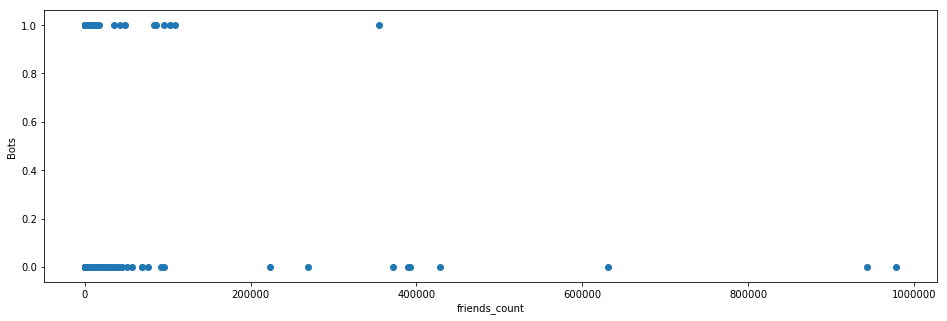

In [49]:
plt.scatter(df.friends_count, df.bot)
plt.xlabel('friends_count')
plt.ylabel('Bots')

When we plot the friends_count and bot into our graph, we clearly can see that real human user can have more friends_count than bots.

In [50]:
logreg = LogisticRegression(C=1e9)
feature_cols = ['friends_count']
X_LR2 = df[feature_cols]
y_LR2 = df.bot
logreg.fit(X_LR2, y_LR2)



LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [51]:
df['Bot_prob'] = logreg.predict_proba(X_LR2)[:, 1]

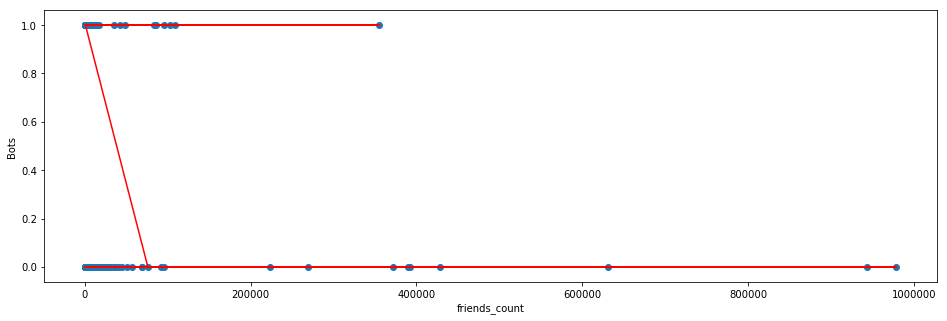

In [52]:
# plot the predicted probabilities
plt.scatter(df.friends_count, df.bot)
plt.plot(df.friends_count, df.bot, color='red')
plt.xlabel('friends_count')
plt.ylabel('Bots')

## Logistic Regression Model Evaluation Using a Validation Set

In [53]:
X_LR = df.drop('bot', 1)
Y_LR = df['bot']

In [54]:
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(X_LR, Y_LR, test_size=0.2, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train_LR[features], y_train_LR)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [55]:
#Get the predicted value with test set
predicted = model2.predict(X_test_LR[features])

# generate class probabilities
probs = model2.predict_proba(X_test_LR[features])

In [56]:
print ('Accuracy Score:',metrics.accuracy_score(y_test_LR, predicted))
print ('ROC AUC Score:', metrics.roc_auc_score(y_test_LR, probs[:, 1]))

Accuracy Score: 0.742729306488
ROC AUC Score: 0.865325325325


In [57]:
print ('Classifictiaon Report:')
print ( metrics.classification_report(y_test_LR, predicted))

Classifictiaon Report:
             precision    recall  f1-score   support

          0       0.74      0.75      0.74       222
          1       0.75      0.73      0.74       225

avg / total       0.74      0.74      0.74       447



In [58]:
preds_lr=model.predict_proba(X_test[features])[:,1]

0.82153784219001613

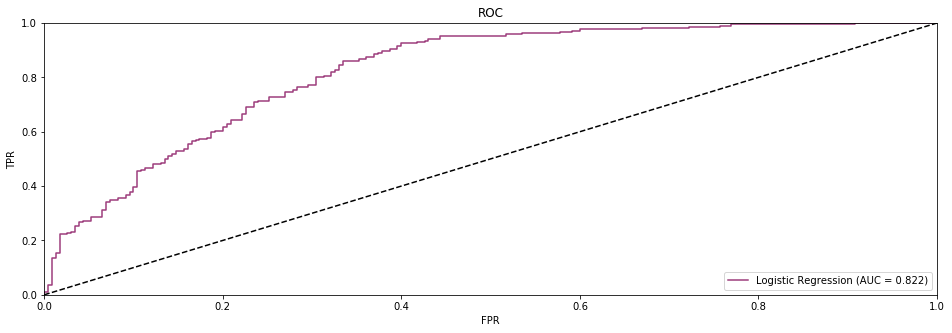

In [59]:
plotUnivariateROC(preds_lr, Y_test_LR, 'Logistic Regression')

## Logistic Regression Model Evaluation Using Cross-Validation


In [60]:
#Cross validation with 10 folds
accuracy = cross_val_score(LogisticRegression(), X_LR[features], Y_LR, scoring='accuracy', cv=10)

print ('Accuracy: ',accuracy.mean())

precision = cross_val_score(LogisticRegression(), X_LR[features], Y_LR, scoring='precision', cv=10)

print ('Precision: ',precision.mean())

recall = cross_val_score(LogisticRegression(), X_LR[features], Y_LR, scoring='recall', cv=10)

print ('Recall: ',recall.mean())


F1 = cross_val_score(LogisticRegression(), X_LR[features], Y_LR, scoring='f1', cv=10)

print ('F1: ',F1.mean())


ROC_AUC = cross_val_score(LogisticRegression(), X_LR[features], Y_LR, scoring='roc_auc', cv=10)

print ('ROC_AUC: ',ROC_AUC.mean())

Accuracy:  0.747627091377
Precision:  0.716093277091
Recall:  0.77358490566
F1:  0.743140539575
ROC_AUC:  0.839856021166


# Traning Models - Neural network

# Neural network

In [61]:
from sklearn.neural_network import MLPClassifier

In [62]:
X_train_NN = train_df.drop('bot', 1)
Y_train_NN = train_df['bot']


X_test_NN = test_df.drop('bot', 1)
Y_test_NN = test_df['bot']

In [63]:
# features are only the numerical and binary features 
features=['age','followers_count','friends_count','listedcount', 'verified', 'favourites_count','statuses_count','default_profile','default_profile_image','screen_name_len','bot_is_substr','bot_in_des']

features

['age',
 'followers_count',
 'friends_count',
 'listedcount',
 'verified',
 'favourites_count',
 'statuses_count',
 'default_profile',
 'default_profile_image',
 'screen_name_len',
 'bot_is_substr',
 'bot_in_des']

In [64]:
X_train_NN = X_train_NN[features]


X_test_NN = X_test_NN[features]

In [65]:

clf_NN = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

clf_NN.fit(X_train_NN, Y_train_NN)      

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [66]:
predict_NN = clf_NN.predict(X_test_NN)

predict_NN

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1,

In [67]:
NN_accuracy = metrics.accuracy_score(predict_NN, Y_test_NN)
NN_accuracy  

0.55605381165919288

In [68]:
[coef.shape for coef in clf_NN.coefs_]

[(12, 5), (5, 2), (2, 1)]

In [69]:
preds_NN = clf_NN.predict_proba(X_test_NN)[:,1]
preds_NN

array([  6.54521040e-001,   7.58537095e-001,   7.58537095e-001,
         3.31519951e-045,   7.58537095e-001,   1.00000000e+000,
         6.54521040e-001,   6.54521040e-001,   6.54521040e-001,
         1.95278463e-001,   7.58537095e-001,   3.58853371e-107,
         2.23836065e-077,   9.58223973e-001,   6.54521040e-001,
         1.00000000e+000,   5.86618185e-001,   0.00000000e+000,
         0.00000000e+000,   6.54521040e-001,   3.56982813e-012,
         6.54521040e-001,   6.54521040e-001,   7.58537095e-001,
         9.91927713e-001,   7.58537095e-001,   6.54521040e-001,
         9.99999307e-001,   6.54521040e-001,   6.54521040e-001,
         7.58537095e-001,   1.82506867e-066,   7.58537095e-001,
         7.58537095e-001,   9.44655744e-001,   9.99999981e-001,
         7.58537095e-001,   7.58537095e-001,   7.58537095e-001,
         6.54521040e-001,   6.54521040e-001,   7.36065286e-012,
         7.58537095e-001,   7.58537095e-001,   9.99807953e-001,
         4.40345021e-001,   7.58537095e-

0.69882246376811596

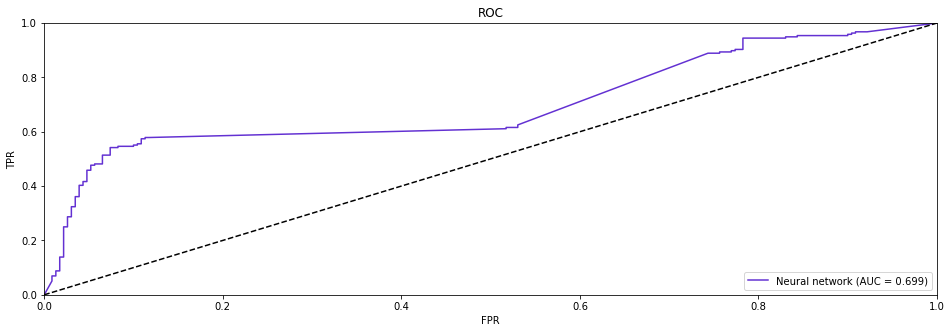

In [70]:
plotUnivariateROC(preds_NN, Y_test_NN, 'Neural network')

# Traning Models - Random Forest Classifier

In [71]:
X_train_RF = train_df.drop('bot', 1)
Y_train_RF = train_df['bot']


X_test_RF = test_df.drop('bot', 1)
Y_test_RF = test_df['bot']

In [72]:
features = ['age','followers_count','friends_count','listedcount','favourites_count','statuses_count','screen_name_len','bot_in_des','bot_is_substr', 'desc_pol','desc_subj']
#features = ['age','followers_count','friends_count','favourites_count','statuses_count','bot_in_des']

In [73]:
X_train_RF_filtered =  X_train_RF[features]

X_test_RF_filtered = X_test_RF[features]

In [74]:
clf = RandomForestClassifier(n_estimators=200, oob_score=False, criterion = "entropy")


clf.fit(X_train_RF_filtered, Y_train_RF)
predicted = clf.predict(X_test_RF_filtered)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test_RF,predicted)

0.91479820627802688

In [75]:
# The highest score we had from the iteration was:
0.9327354260089686

0.9327354260089686

In [76]:
preds_RF = clf.predict_proba(X_test_RF_filtered)[:,1]

0.9668075684380032

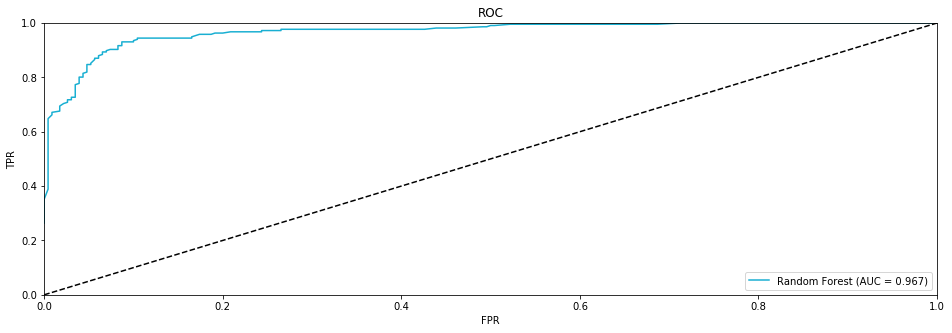

In [77]:
plotUnivariateROC(preds_RF, Y_test_RF, 'Random Forest')

# ROC curve evaluation for all models

0.84558558558558561

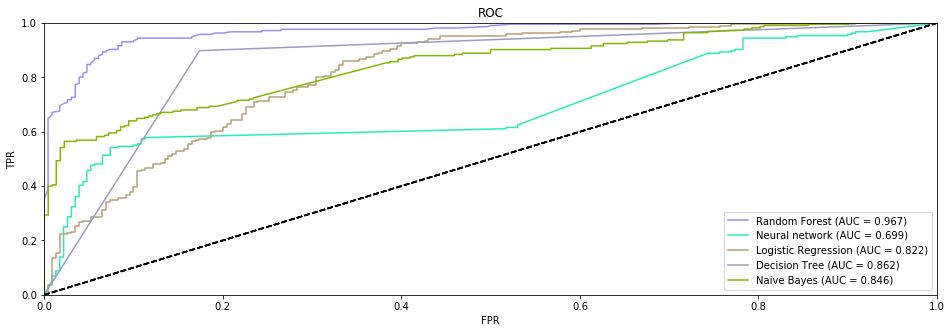

In [86]:
plotUnivariateROC(preds_RF, Y_test_RF, 'Random Forest')
plotUnivariateROC(preds_NN, Y_test_NN, 'Neural network')
plotUnivariateROC(preds_lr, Y_test_LR, 'Logistic Regression')
plotUnivariateROC(preds_dt, Y_test, 'Decision Tree')
plotUnivariateROC(preds_lr_nb, y_test_NB, 'Naive Bayes')